
# AIエンジニアリング　中間レポート

## はじめに

- ファイル名は `学籍番号.ipynb` とすること
- テキストはこのように Markdown で書くこと
- Markdownを知らない人はGoogle検索してください
- 適時コード中にコメントを書く形でも良い
- 学習するモデルは1つでもいいし、それ以上でも良い
- scikit-learn で可能な範囲内で頑張ってみてください

## 採点基準

- (↑優先順位高)
- なにをどうしているか、きちんと適切なコメントあるいはMarkdownを書く
- 今回の問題に即した適切なモデルを使う(分類か？回帰か？など)
- 過学習していないこと
- なるべくきれいなコードを心がける
- 学習しなかったデータに対しても高い精度が出せること
- 学習アルゴリズムに対してパラメータ(引数)を明示的に指定する場合は、引数の意味などを書く
- 講義で紹介しなかった手法などを使ってみると良いが、その場合はなぜその手法を選んだのか、どういう手法なのかを書くとなお良い
- 精度が高い方が良いに越したことはないですが、他の要素より優先順位は低めです
- (↓優先順位低)

## CIFAR-10 の読み込み

画像データセットの CIFAR-10 を読み込みます。このセルは編集しなくても構いません。

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


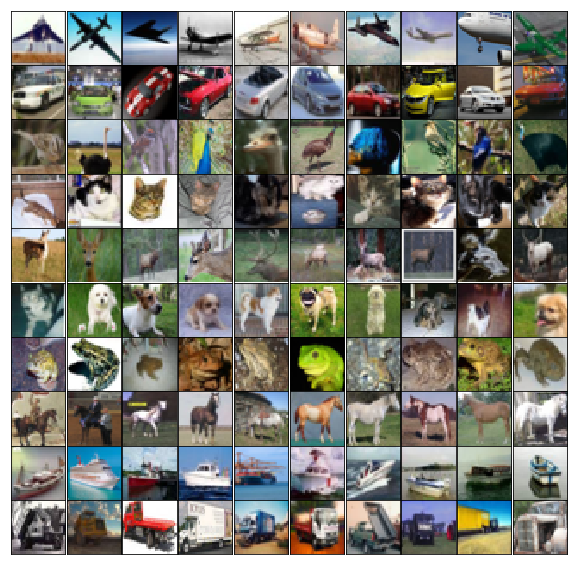

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), _ = cifar10.load_data()
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
x_train = x_train / 255; x_test = x_test / 255
n_train, n_test = x_train.shape[0], x_test.shape[0]
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(10):
    index, cnt = 0, 0
    while(True):
        if y_train[index] == i:
            ax = fig.add_subplot(10, 10, i*10+cnt+1, xticks=[], yticks=[])
            ax.imshow(x_train[index])
            cnt += 1
        if cnt >= 10: break
        index += 1
plt.show()

CIFAR-10 は上記のような 28x28 ピクセルのフルカラー画像を分類するデータセット。
10クラス分類で、以下のクラスがある
- 0: airplane (飛行機)
- 1: automobile (乗用車)
- 2: bird (鳥)
- 3: cat (ネコ)
- 4: deer (シカ)
- 5: dog (イヌ)
- 6: frog (カエル)
- 7: horse (ウマ)
- 8: ship (船舶)
- 9: truck (トラック、トレーラー)

In [0]:
# 扱いやすい形式に変形しておきます
x_train, x_test = x_train.reshape(n_train, -1), x_test.reshape(n_test, -1)
y_train = y_train.ravel(); y_test = y_test.ravel()

In [0]:
# x_train, x_test, y_train, y_test の shape を見る
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

# x_train, x_test のデータ数
n_train, n_test = x_train.shape[0], x_test.shape[0]
print(n_train, n_test)

(35000, 3072) (15000, 3072)
(35000,) (15000,)
35000 15000


## モデルを作って検証する



ここから先はいろいろ改良して良いモデルを作ってください。

学習データをうまく分類できるからといって良いモデルとは限らないことに注意してください。


In [0]:
# サンプル 
# Ridge を使って分類してみます
import numpy as np
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier(alpha=1.0)
model.fit(x_train, y_train)

# 学習データに対する精度
print("Train acc = ", model.score(x_train, y_train))

# テストデータに対する精度
print("Test acc = ", model.score(x_test, y_test))

Train acc =  0.5269428571428572
Test acc =  0.3682666666666667


Ridgeを使った結果、（以下略）〜

## 以下レポート内容

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

#
# CIFAR10 を読み込む
#

(x_train, y_train), _ = cifar10.load_data()

# 全体の3割はテスト用のデータとし、残りを学習用データにする
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3) 

# 255で割って0〜1に正規化する
x_train = x_train / 255
x_test = x_test / 255
x_train, x_test = x_train.reshape(n_train, -1), x_test.reshape(n_test, -1)
y_train = y_train.ravel(); y_test = y_test.ravel()

n_train, n_test = x_train.shape[0], x_test.shape[0]

## 分類モデルを使って学習する

ここでは Random Forest を使ってみる

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(x_train, y_train) # 学習データで学習

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

精度を求めてみる

In [0]:
# 学習データで精度を求める
print("train:", accuracy_score(y_train, model.predict(x_train)))

# テストデータで精度を求める
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 0.9937428571428571
test: 0.34113333333333334


学習データで約99%, テストデータで約34%とおおきな乖離があり、過学習していると思われる。
scikit learnのRandomForestはデフォルトだと10個の木しか作らないが、これは少ないらしいので推奨されている100くらいに増やしてまたやってみる。

In [0]:
model = RandomForestClassifier(n_estimators=100)

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 1.0
test: 0.45293333333333335


若干改善されたが、まだ過学習している。
過学習の原因はモデルの表現能力が高すぎることなので、これを制限することを考えてみる。
RandomForestの場合は木の深さを制限してあげればよいはずなので、試しに深さを3に制限してみる。
木の数も計算時間の短縮も兼ねて少なめにしてみる。

In [0]:
model = RandomForestClassifier(n_estimators=50, max_depth=3)

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 0.29422857142857145
test: 0.2814


過学習は避けられたが、今度は精度自体が低くなってしまった。max_depthが少なすぎるのかもしれないので少し増やしてみる。

In [0]:
model = RandomForestClassifier(n_estimators=50, max_depth=5)

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 0.34822857142857144
test: 0.32553333333333334


両方とも約33%と大きく改善された。さらに増やしてみる。

In [0]:
model = RandomForestClassifier(n_estimators=50, max_depth=8)

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 0.4891142857142857
test: 0.3758


また過学習してしまった。max_depthを少し減らして、n_estimatorsは増やしてみる。

In [0]:
model = RandomForestClassifier(n_estimators=100, max_depth=6)

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

train: 0.38085714285714284
test: 0.3436666666666667


少し改善された。これくらいがRandomForestの限界かもしれない。
さらなる改善のためにGBDTを使ってみる。

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(x_train, y_train)
print("train:", accuracy_score(y_train, model.predict(x_train)))
print("test:", accuracy_score(y_test,  model.predict(x_test)))

（その他、他のデータセットで試してみる、他のアルゴリズムで試してみる、前処理を工夫してみる、精度をグラフにプロットしてみる、などの工夫があるとなおよい）